# <p style="text-align: center;">EE 380L:  Data Mining</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Friday April 17th, 2020, submitted via Canvas by 11:59 pm </p>

Your homework should be written in a **Jupyter notebook**. It is an individual homework. Be sure to include name and UTID. 

Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Question 1 (20 points)

**1. Using stochastic gradient descent, derive the coefficent updates for all 5 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2 + w_4*x_2^2+w_5*x_1*x_2*x_3+w_6*x_3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.**


Let's start with a change of variable: 

$$ y = w_0*X_0 + w_1*X_1 + w_2*X_2 + w_3*X_3 + w_4*X_4+w_5*X_5+w_6*X_6$$

Where
$$X_0=1;  X_1=x_1; X_2=x_1*x_2; X_3=x_2;   X_4=x_2^2;  X_5=x_1*x_2*x_3;  X_6=x_3; $$

Therefore,

$$	\sum_{i=0}^{6} w_i.X_i =W^T.X$$

Then we define our cost function as sum of squared error:
$$ L =	\frac{1}{2}(\sum_{i}^{m}(y^{(i)}-\hat{y}^{(i)})^2 + \lambda \sum_{j=0}^{p}w_j^2$$

Then we can use equation below to find magnitude and direction of the weight updated computed by taking a step in the opposite direction of thecost gradient 
$$ \Delta w_j = - \alpha \frac {\partial L} {\partial w_j}; $$
where $\alpha$ is the learning rate. 

The weights are then updated after each epoch via:        **W**:=**W**+ $\Delta$**W**


Therefore, 

$$ \Delta w_j = - \alpha \frac {\partial L} {\partial w_j}$$

$$= - \alpha( \sum_{i}{(y^{(i)}-\hat{y}^{(i)})}  (-X_j^{(i)})+  \lambda \sum_{j=0}^{p}w_j)$$



In Stochastic Gradient Descent (SGD), we update the weights after each training sample:


    
    
  

- For one or more eapoches or until minimum cost is achieved:
    - for training sample i:
         - for each weight j:      
$$w_j:=w_j+\Delta w_j$$

lets first find first part: 

$$\Delta w_j^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (X_j^{(i)}) $$

which means: 

$$\Delta w_0^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (X_0^{(i)}) $$

$$\Delta w_1^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (X_1^{(i)}) $$

$$\Delta w_2^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (X_2^{(i)}) $$

$$\Delta w_3^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (X_3^{(i)}) $$

$$\Delta w_4^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (X_4^{(i)}) $$

$$\Delta w_5^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (X_5^{(i)}) $$

$$\Delta w_6^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (X_6^{(i)}) $$

Hence, 


$$\Delta w_0^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (1) $$

$$\Delta w_1^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (x_1^{(i)})$$  
$$\Delta w_2^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (x_1^{(i)}*x_2^{(i)})$$

$$\Delta w_3^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (x_2^{(i)}) $$

$$\Delta w_4^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (x_2^{(i)}*x_2^{(i)}) $$

$$\Delta w_5^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (x_1^{(i)}*x_2^{(i)}*x_3^{(i)}) $$

$$\Delta w_6^1:=\alpha {(y^{(i)}-\hat{y}^{(i)})}  (x_3^{(i)}) $$


and second part,

$$\Delta w_j^2=\lambda \sum_{j=0}^{p}w_j $$

Note that these updates are performaed per each of training sample i. 

So finally, 

$$\begin{bmatrix} w_0\\w_1\\ w_2\\w_3\\w_4\\ w_5\\w_6\end{bmatrix}:=\begin{bmatrix} w_0\\w_1\\ w_2\\w_3\\w_4\\ w_5\\w_6\end{bmatrix}-\alpha \begin{bmatrix} {(y^{(i)}-\hat{y}^{(i)})}\\{(y^{(i)}-\hat{y}^{(i)})} x_1\\ {(y^{(i)}-\hat{y}^{(i)})} x_1 x_2\\{(y^{(i)}-\hat{y}^{(i)})} x_2\\{(y^{(i)}-\hat{y}^{(i)})} x_2^2 \\ {(y^{(i)}-\hat{y}^{(i)})} x_1 x_2 x_3\\{(y^{(i)}-\hat{y}^{(i)})} x_3\end{bmatrix}+  \lambda \sum_{j=0}^{p}w_j$$


2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2 + w_4*x_2^2+w_5*x_1*x_2*x_3+w_6*x_3$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning_rate = [0.000001, 0.00001, 0.0001, 0.001] and regularization constants in the range: [0,10] . Plot MSE and the $w$ parameters as a function of epoch count (10 epochs) for the best 2 combinations of learning_rate and regularization. ie you should have plots of MSE and parameter updates. Report the MSE at the end of 10 epochs for both combinations.

In [0]:
class SGD:
    def __init__(self,X,Y,alpha_val,lambda_val,epoches,Xtest):
        self.X=X
        self.Y=Y
        self.Xtest=Xtest
        self.alpha_val=alpha_val
        self.lambda_val=lambda_val
        self.epoches=epoches
        
    def fit(self):  
        Loss_matrix = np.zeros((epoches,len(self.alpha_val),len(self.lambda_val))) # Pre-allocate matrix
        W_matrix    = np.zeros((epoches,self.X.shape[1],len(self.alpha_val),len(self.lambda_val))) # Pre-allocate matrix
        # seed=1989
        for countlambda,lambdaval in enumerate(self.lambda_val): 
            for countalpha,alphaval in enumerate(self.alpha_val): 
                W=np.random.rand(7,1)
                # W=np.zeros((7,1))
                losslog=[]
                Wlog=[]
                for k in range(self.epoches): 
                    for i in range(self.X.shape[0]):                        
                        ffd=(W.T).dot(self.X[i,:].reshape(-1,1))
                        Loss=(ffd-self.Y[i])**2
                        dw=2*(ffd-self.Y[i])*self.X[i,:].reshape(-1,1)
                        W=W-self.alpha_val[countalpha]*dw+(0.5)*lambdaval*np.sum(W**2)       #SGD update 
                    # W=W+(0.5)*lambdaval*np.sum(W**2)   #regularization                   
                    losslog.append(Loss)
                    Wlog.append(W)
                losslog=np.asarray(losslog)
                Wlog=np.asarray(Wlog)
                Loss_matrix[:,countalpha,countlambda]=losslog[:,0,0]
                W_matrix[:,:,countalpha,countlambda]=Wlog[:,:,0]

        void=Loss_matrix[self.epoches-1,:,:].copy()
        loc=np.where(void==np.nanmin(void))
        gr_a_1=loc[0]
        gr_l_1=loc[1]
        void[gr_a_1,gr_l_1]=np.nan
        loc=np.where(void==np.nanmin(void))
        gr_a_2=loc[0]
        gr_l_2=loc[1]
        
        
        figure(num=None, figsize=(3, 5), dpi=80, facecolor='w', edgecolor='k')
        plt.plot((Loss_matrix[:,gr_a_1,gr_l_1]),'s-')
        plt.plot((Loss_matrix[:,gr_a_2,gr_l_2]),'d-')
        plt.legend((r'$\alpha =1e-4  and \lambda=0$'  ,r'$\alpha = 1e-6 and \lambda=0$'))
        plt.grid()
        plt.title('MSE')
        plt.xlabel('Epoches')
        plt.ylabel('MSE')

        figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
        plt.subplot(211)
        for k in range (W_matrix.shape[1]):
            plt.plot(W_matrix[:,k,gr_a_1,gr_l_1], label='W%d' %k)

        plt.grid()
        plt.title('Ws-case1 with learning rate of %.7f and lambda of %.7f'% (alpha_val[gr_a_1],lambda_val[gr_l_1]) )
        plt.xlabel('epoches')
        plt.ylabel('weights')

        plt.subplot(212)
        for k in range (W_matrix.shape[1]):
            plt.plot(W_matrix[:,k,gr_a_2,gr_l_2], label='W%d' %k)
        plt.title('Ws-case2 with learning rate of %.7f and lambda of %.7f'% (alpha_val[gr_a_2],lambda_val[gr_l_2]) )
        plt.xlabel('epoches')
        plt.ylabel('weights')
        plt.grid()

        plt.legend()
        plt.show() 

        MSE1=Loss_matrix[-1,gr_a_1,gr_l_1]
        L1=lambda_val[gr_l_1]
        a1=alpha_val[gr_a_1]
        print("MSE 1st is {} with learning rate of {} and Lambda of {}".format(round(np.sqrt(MSE1[0]),4),a1[0,0],L1[0,0]))
        MSE2=Loss_matrix[-1,gr_a_2,gr_l_2]
        L2=lambda_val[gr_l_2]
        a2=alpha_val[gr_a_2]
        print("MSE 2nd is {} with learning rate of {} and Lambda of {}".format(round(np.sqrt(MSE2[0]),4),a2[0,0],L2[0,0]))
        W_matrix_out=W_matrix[:,:,gr_a_1,gr_l_1]
        W_matrix_out=W_matrix_out[-1,:,0].reshape(-1,1)
        self.W_matrix_out=W_matrix_out

    def predict(self,Xtest): 
        self.Xtest=Xtest
        ffd=(self.Xtest).dot(self.W_matrix_out)

        return(ffd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


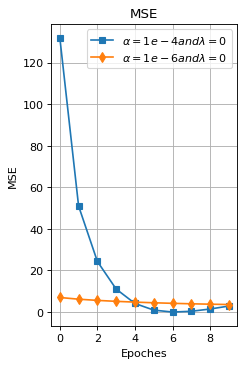

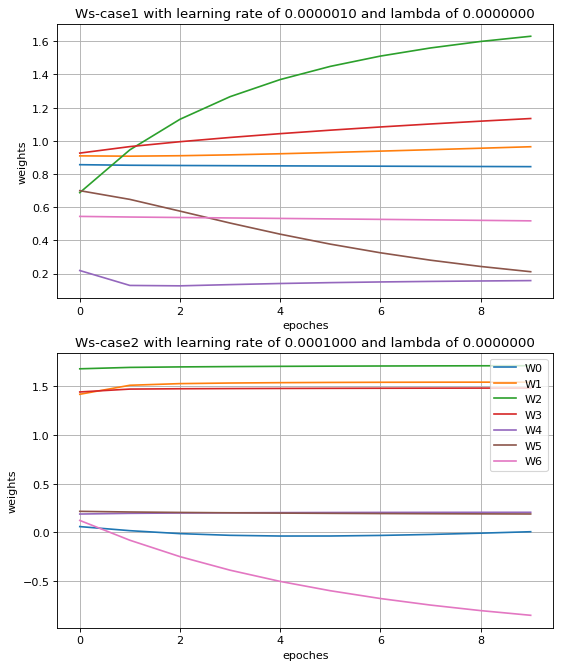

MSE 1st is 1.7036 with learning rate of 1e-06 and Lambda of 0
MSE 2nd is 1.9034 with learning rate of 0.0001 and Lambda of 0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

link='https://drive.google.com/open?id=1mwD4l7R3xWUZ3pQJ9z6Uc3oXuSQ8bapL'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('samples1.csv')  
df = pd.read_csv('samples1.csv')

### Data preparation
# df = pd.read_csv("samples1.csv")
X=df[['x_1','x_2','x_3']]
y=df['y']
X=(X.to_numpy())
y=(y.to_numpy())
x1=X[:,0].reshape(-1,1)
x2=X[:,1].reshape(-1,1)
x3=X[:,2].reshape(-1,1)
x0=abs(x3)*0+1
Xvect=np.concatenate((x0,x1,x1*x2,x2,x2**2,x1*x2*x3,x3), axis=1)
Yvect=y.reshape(-1,1)
epoche_val=20
win=np.zeros((7,1))
Xvect.shape
Learning_rates = [0.000001, 0.00001, 0.0001, 0.001]
Lambda_rates = np.asarray(list(range(10)))
m=X.shape[0]

### Input parameters 
epoches =10
alpha=[0.000001, 0.00001, 0.0001, 0.001]
alpha_val=np.asarray(alpha)
alpha_val=alpha_val.reshape(-1,1)

lambda_val = [j for j in range(0,10)]
lambda_val=np.asarray(lambda_val)
lambda_val=lambda_val.reshape(-1,1)

### using SGD
Xtest= W=np.random.rand(10,3)
x1t=Xtest[:,0].reshape(-1,1)
x2t=Xtest[:,1].reshape(-1,1)
x3t=Xtest[:,2].reshape(-1,1)
x0t=abs(x3t)*0+1
Xtest_vect=np.concatenate((x0t,x1t,x1t*x2t,x2t,x2t**2,x1t*x2t*x3t,x3t), axis=1)

model=SGD(Xvect,Yvect,alpha_val,lambda_val,epoches,Xtest_vect)
model.fit()
prediction=model.predict(Xtest_vect)

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error, and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modeled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates will be done using SGD. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

# Question 2: Multi-layer Perceptron regressor (20 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

# Option 1 using cross_val_score with KFold

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics,linear_model,model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline


link='https://drive.google.com/open?id=1ss0Z2P58r4XULuAW4GbmIdCEPzjjBaz8'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Hitters.csv')  
data = pd.read_csv('Hitters.csv')


# data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)


X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

##### Q2.1

regressor = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate = 'constant', random_state = 42,batch_size=40, learning_rate_init = 0.001)
scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
Scores_1=np.mean(scores)*-1

print ("The root-mean-squared values for Q2.1 is {}".format(np.sqrt(Scores_1)))

##### Q2.1
## a
regressor = MLPRegressor(hidden_layer_sizes = (2,) ,activation = 'tanh', solver = 'sgd', learning_rate = 'constant', random_state = 42,batch_size=40, learning_rate_init = 0.001)
scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
Scores_2=np.mean(scores)*-1

print ("The root-mean-squared values for 2 hidden units is {}".format(np.sqrt(Scores_2)))

## b
regressor = MLPRegressor(hidden_layer_sizes = (15,) ,activation = 'tanh', solver = 'sgd', learning_rate = 'constant', random_state = 42,batch_size=40, learning_rate_init = 0.001)
scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
Scores_3=np.mean(scores)*-1

print ("The root-mean-squared values for 15 hidden units is {}".format(np.sqrt(Scores_3)))

The root-mean-squared values for Q2.1 is 288.3822605236804
The root-mean-squared values for 2 hidden units is 416.9910277005125
The root-mean-squared values for 15 hidden units is 326.5307447331957


# option 2 using Kfold 

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics,linear_model,model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline


link='https://drive.google.com/open?id=1ss0Z2P58r4XULuAW4GbmIdCEPzjjBaz8'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Hitters.csv')  
data = pd.read_csv('Hitters.csv')


# data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)


X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)


regressor = MLPRegressor(hidden_layer_sizes = (2,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size=40, learning_rate_init = 0.001)
nkfold=5
kf = KFold(n_splits=nkfold)

RMSE=[]
for i, j in kf.split(X_train):
    x_train_fold, x_test_fold = X_train[i], X_train[j ]
    y_train_fold, y_test_fold = y_train.to_numpy()[i], y_train.to_numpy()[j ]
    regressor.fit(x_train_fold, y_train_fold)
    y_pred_fold = regressor.predict(x_test_fold)
    RMSE.append(np.sqrt((np.linalg.norm(y_pred_fold - y_test_fold)**2)/y_pred_fold.shape[0]))
    



print ("The root-mean-squared values for 2 hidden units is {}".format(np.asarray(RMSE).mean()))

regressor = MLPRegressor(hidden_layer_sizes = (15,),activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size=40, learning_rate_init = 0.001)
nkfold=5
kf = KFold(n_splits=nkfold)

RMSE=[]
for i, j in kf.split(X_train):
    x_train_fold, x_test_fold = X_train[i], X_train[j ]
    y_train_fold, y_test_fold = y_train.to_numpy()[i], y_train.to_numpy()[j ]
    regressor.fit(x_train_fold, y_train_fold)
    y_pred_fold = regressor.predict(x_test_fold)
    RMSE.append(np.sqrt((np.linalg.norm(y_pred_fold - y_test_fold)**2)/y_pred_fold.shape[0]))



print ("The root-mean-squared values for 15 hidden units is {}".format(np.asarray(RMSE).mean()))

The root-mean-squared values for 2 hidden units is 408.6576404140361
The root-mean-squared values for 15 hidden units is 320.1430062292724


In [0]:
##### Q2

regressor = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate = 'constant', random_state = 42,batch_size=40, learning_rate_init = 0.001)
regressor.fit(X_train, y_train)

yhat_train = regressor.predict(X_train)
yhat_test = regressor.predict(X_test)
RMSE_train =(np.sqrt((np.linalg.norm(y_train - yhat_train)**2)/yhat_train.shape[0]))
RMSE_test =(np.sqrt((np.linalg.norm(y_test - yhat_test)**2)/yhat_test.shape[0]))  
print ("The root-mean-squared values for Q2 is,  Train: {}   Test:  {} ".format(RMSE_train,RMSE_test))

# ##### Q2.2
# ## a
regressor = MLPRegressor(hidden_layer_sizes = (2,) ,activation = 'tanh', solver = 'sgd', learning_rate = 'constant', random_state = 42,batch_size=40, learning_rate_init = 0.001)
regressor.fit(X_train, y_train)

yhat_train = regressor.predict(X_train)
yhat_test = regressor.predict(X_test)

RMSE_train =(np.sqrt((np.linalg.norm(y_train - yhat_train)**2)/yhat_train.shape[0]))
RMSE_test =(np.sqrt((np.linalg.norm(y_test - yhat_test)**2)/yhat_test.shape[0]))  


print ("The root-mean-squared values for 2 hidden units is:  Train: {}   Test:  {} ".format(RMSE_train,RMSE_test))

# ## b
regressor = MLPRegressor(hidden_layer_sizes = (15,) ,activation = 'tanh', solver = 'sgd', learning_rate = 'constant', random_state = 42,batch_size=40, learning_rate_init = 0.001)
regressor.fit(X_train, y_train)

yhat_train = regressor.predict(X_train)
yhat_test = regressor.predict(X_test)
RMSE_train =(np.sqrt((np.linalg.norm(y_train - yhat_train)**2)/yhat_train.shape[0]))
RMSE_test =(np.sqrt((np.linalg.norm(y_test - yhat_test)**2)/yhat_test.shape[0]))  
print ("The root-mean-squared values for 15 hidden unit units is:  Train: {}   Test:  {} ".format(RMSE_train,RMSE_test))

The root-mean-squared values for Q2 is,  Train: 189.24920752376542   Test:  391.4480440014285 
The root-mean-squared values for 2 hidden units is:  Train: 351.08773942336785   Test:  467.092086250588 
The root-mean-squared values for 15 hidden unit units is:  Train: 303.4705137355625   Test:  414.93511473966237 


## Q2.2

The hidden layer size represents the number of neurons in the ith hidden layer. Apparently the higher the numebr of neurons the lower is the RMSE. It is noteworthy that the number of neurons should be something in between size of the input layer and the output layer.  

In general having more layers results in a network with higher desire to recognize certain aspects of input data. Although, one layer can also detect the stats, it requires neurons as it cannot rely on other neurons to do portion of the total calculation required to detect that stat. Therefore, for one single layer the more neurons we have the higher is the possibility of resolving aspects of the input data and as a result the RMSE drops. so case (b) with higher neurons in hidden layer has a better performance. 

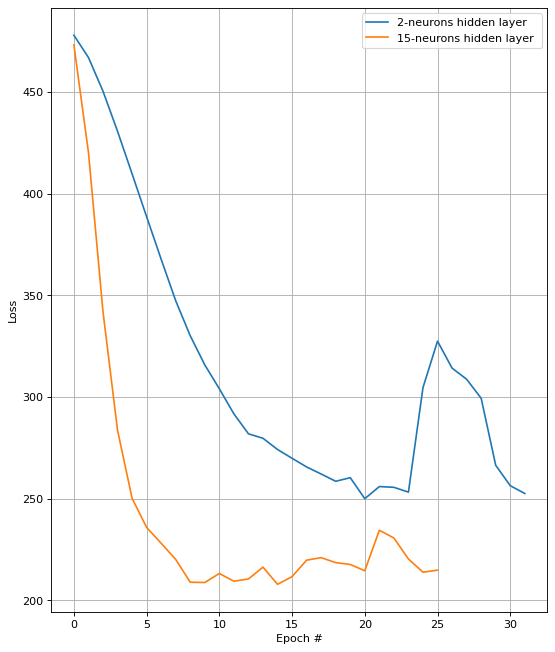

In [0]:
##### Q2
# ##### Q2.3
# ## a
regressor2 = MLPRegressor(hidden_layer_sizes = (2,) ,activation = 'tanh', solver = 'sgd', learning_rate = 'constant', random_state = 42,batch_size=40, learning_rate_init = 0.001)
regressor2.fit(X_train, y_train)

# ## b
regressor3 = MLPRegressor(hidden_layer_sizes = (15,) ,activation = 'tanh', solver = 'sgd', learning_rate = 'constant', random_state = 42,batch_size=40, learning_rate_init = 0.001)
regressor3.fit(X_train, y_train)
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.sqrt(regressor2.loss_curve_),label="2-neurons hidden layer ")
plt.plot(np.sqrt(regressor3.loss_curve_),label="15-neurons hidden layer ")
plt.legend()
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.grid()
plt.show()

One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (5pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (3pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* value. (2pts)

# Question 3 (10 points)

Implement a CNN for character recognition on MINST using **pytorch**. You can form the CNN architecture with 'n' layers followed by a fully connected layer. However, Report the performance of the model on three conditions:
1. Dropout - with and without dropout
2. CNN kernel filter change - two filter sizes of your choice
3. Learning rate change or optimizer change - two learning rates or two different optimizers. 

Please tabulate your result. Ensure that in all of the above cases the accuracy is >= 95%.

# CNN models 


In [0]:
!pip install torch torchvision

In [0]:
import torch, torchvision
from torch import nn,optim
from torch.autograd import Variable as var 
Batch_size = 64
alpha = 0.01
Epoches = 15
skp_print = 250

In [0]:
##Loading Data 

T = torchvision.transforms.ToTensor()
train_data = torchvision.datasets.MNIST('mnist_data',train=True,download=True,transform=T)
val_data = torchvision.datasets.MNIST('mnist_data',train=False,download=True,transform=T)

train_dl = torch.utils.data.DataLoader(train_data,batch_size = Batch_size)
val_dl = torch.utils.data.DataLoader(val_data,batch_size = Batch_size)

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw
Processing...
Done!


## without droput 

In [0]:
###CNN
class CNNmnist1(nn.Module):
  def __init__(self):
    super(CNNmnist1,self).__init__()
    self.cnn1 = nn.Conv2d(1,3,3)
    self.cnn2 = nn.Conv2d(3,2,5)
    self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
    # self.drop1= nn.Dropout()
    self.linear = nn.Linear(968,10)
    self.relu = nn.ReLU()
  
  def forward(self,x):
    n = x.size(0)
    x = self.relu(self.cnn1(x))
    x = self.relu(self.cnn2(x))
    x = x.view(n,-1)
    x = self.linear(x)
    return x

In [0]:
##Training  1

CNNmnist1 = CNNmnist1().cuda()
cec = nn.CrossEntropyLoss()
optimizer = optim.Adam(CNNmnist1.parameters(),lr = alpha)

def validate(model,data):
  # accuracy = (correct/total)*100.
  total = 0
  correct = 0
  for i,(images,labels) in enumerate(data):
    images = var(images.cuda())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)
  return correct*100./total

for e_c in range(Epoches):
  for i,(images,labels) in enumerate(train_dl):
    images = var(images.cuda())
    labels = var(labels.cuda())
    optimizer.zero_grad()
    pred = CNNmnist1(images)
    loss = cec(pred,labels)
    loss.backward()
    optimizer.step()
    if (i+1) % skp_print == 0:
      accuracy = float(validate(CNNmnist1,val_dl))
      print('Epoch #{}, Batch #{}, with Loss of {}, and Accuracy of {}%'.format(e_c+1,i+1,round(float(loss.data),4),round(accuracy,4)))

Epoch #1, Batch #250, with Loss of 0.5526, and Accuracy of 95.24%
Epoch #1, Batch #500, with Loss of 0.2047, and Accuracy of 95.95%
Epoch #1, Batch #750, with Loss of 0.1005, and Accuracy of 96.01%
Epoch #2, Batch #250, with Loss of 0.4046, and Accuracy of 97.07%
Epoch #2, Batch #500, with Loss of 0.0936, and Accuracy of 96.61%
Epoch #2, Batch #750, with Loss of 0.0639, and Accuracy of 96.36%
Epoch #3, Batch #250, with Loss of 0.3048, and Accuracy of 97.16%
Epoch #3, Batch #500, with Loss of 0.0335, and Accuracy of 96.73%
Epoch #3, Batch #750, with Loss of 0.0521, and Accuracy of 96.4%
Epoch #4, Batch #250, with Loss of 0.2224, and Accuracy of 97.28%
Epoch #4, Batch #500, with Loss of 0.0322, and Accuracy of 96.95%
Epoch #4, Batch #750, with Loss of 0.037, and Accuracy of 96.38%
Epoch #5, Batch #250, with Loss of 0.2275, and Accuracy of 97.28%
Epoch #5, Batch #500, with Loss of 0.0328, and Accuracy of 96.66%
Epoch #5, Batch #750, with Loss of 0.0271, and Accuracy of 95.98%
Epoch #6, Ba

## with droput 

In [0]:
###CNN
class CNNmnist2(nn.Module):
  def __init__(self):
    super(CNNmnist2,self).__init__()
    self.cnn1 = nn.Conv2d(1,3,3)
    self.cnn2 = nn.Conv2d(3,2,5)
    # self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=1)
    self.drop1= nn.Dropout()
    self.linear = nn.Linear(968,10)
    self.relu = nn.ReLU()
  
  def forward(self,x):
    n = x.size(0)
    x = self.relu(self.cnn1(x))
    x = self.relu(self.cnn2(x))
    x = x.view(n,-1)
    x = self.linear(x)
    return x

In [0]:
##Training  2
Epoches = 15
CNNmnist2= CNNmnist2().cuda()
cec = nn.CrossEntropyLoss()
optimizer = optim.Adam(CNNmnist2.parameters(),lr = alpha)

def validate(model,data):
  # accuracy = (correct/total)*100.
  total = 0
  correct = 0
  for i,(images,labels) in enumerate(data):
    images = var(images.cuda())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)
  return correct*100./total

for e_c in range(Epoches):
  for i,(images,labels) in enumerate(train_dl):
    images = var(images.cuda())
    labels = var(labels.cuda())
    optimizer.zero_grad()
    pred = CNNmnist2(images)
    loss = cec(pred,labels)
    loss.backward()
    optimizer.step()
    if (i+1) % skp_print == 0:
      accuracy = float(validate(CNNmnist2,val_dl))
      print('Epoch #: {}, Batch #: {}, with Loss: {}, and Accuracy of: {}%'.format(e_c+1,i+1,round(float(loss.data),4),round(accuracy,4)))

Epoch #: 1, Batch #: 250, with Loss: 0.4281, and Accuracy of: 93.49%
Epoch #: 1, Batch #: 500, with Loss: 0.2296, and Accuracy of: 94.6%
Epoch #: 1, Batch #: 750, with Loss: 0.2399, and Accuracy of: 95.82%
Epoch #: 2, Batch #: 250, with Loss: 0.2365, and Accuracy of: 96.11%
Epoch #: 2, Batch #: 500, with Loss: 0.2025, and Accuracy of: 96.62%
Epoch #: 2, Batch #: 750, with Loss: 0.2703, and Accuracy of: 96.38%
Epoch #: 3, Batch #: 250, with Loss: 0.1915, and Accuracy of: 96.67%
Epoch #: 3, Batch #: 500, with Loss: 0.1733, and Accuracy of: 96.89%
Epoch #: 3, Batch #: 750, with Loss: 0.1451, and Accuracy of: 96.46%
Epoch #: 4, Batch #: 250, with Loss: 0.1943, and Accuracy of: 95.73%
Epoch #: 4, Batch #: 500, with Loss: 0.1933, and Accuracy of: 96.97%
Epoch #: 4, Batch #: 750, with Loss: 0.1381, and Accuracy of: 96.56%
Epoch #: 5, Batch #: 250, with Loss: 0.2059, and Accuracy of: 96.68%
Epoch #: 5, Batch #: 500, with Loss: 0.2138, and Accuracy of: 96.48%
Epoch #: 5, Batch #: 750, with Loss

### Note 1
So far, as a result, suggest, adding dropout helps in improving the performance of the classification of digits. The main reason is that by adding dropout, the network is less optimized for training data, so it reduces the overfitting. As a consequence, the test set accuracy gets better since now the model is slightly more generalizable. Hence, for the rest of the model tryouts I am going to keep the droput. 

In the last model the filter size of the first layer I had 3 layers with kernel size of 3 and for the second layer I had two filters with kernel size of 5. For the next model I change them to 5 filerts with kernel size of 5 and 3 fileters with kernel size of 7, respectively. 

In [0]:
###CNN
class CNNmnist3(nn.Module):
  def __init__(self):
    super(CNNmnist3,self).__init__()
    self.cnn1 = nn.Conv2d(1,5,5)
    self.cnn2 = nn.Conv2d(5,3,7)
    self.drop1= nn.Dropout()
    self.linear = nn.Linear(972,10)
    self.relu = nn.ReLU()
  
  def forward(self,x):
    n = x.size(0)
    x = self.relu(self.cnn1(x))
    x = self.relu(self.cnn2(x))
    x = x.view(n,-1)
    x = self.linear(x)
    return x

In [0]:
##Training  3

CNNmnist3= CNNmnist3().cuda()
cec = nn.CrossEntropyLoss()
optimizer = optim.Adam(CNNmnist3.parameters(),lr = alpha)

def validate(model,data):
  # accuracy = (correct/total)*100.
  total = 0
  correct = 0
  for i,(images,labels) in enumerate(data):
    images = var(images.cuda())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)
  return correct*100./total

for e_c in range(Epoches):
  for i,(images,labels) in enumerate(train_dl):
    images = var(images.cuda())
    labels = var(labels.cuda())
    optimizer.zero_grad()
    pred = CNNmnist3(images)
    loss = cec(pred,labels)
    loss.backward()
    optimizer.step()
    if (i+1) % skp_print == 0:
      accuracy = float(validate(CNNmnist3,val_dl))
      print('Epoch #: {}, Batch #: {}, with Loss: {}, and Accuracy of: {}%'.format(e_c+1,i+1,round(float(loss.data),4),round(accuracy,4)))

Epoch #: 1, Batch #: 250, with Loss: 0.3588, and Accuracy of: 95.14%
Epoch #: 1, Batch #: 500, with Loss: 0.2204, and Accuracy of: 95.58%
Epoch #: 1, Batch #: 750, with Loss: 0.0706, and Accuracy of: 95.96%
Epoch #: 2, Batch #: 250, with Loss: 0.3231, and Accuracy of: 97.23%
Epoch #: 2, Batch #: 500, with Loss: 0.0901, and Accuracy of: 97.05%
Epoch #: 2, Batch #: 750, with Loss: 0.1004, and Accuracy of: 96.07%
Epoch #: 3, Batch #: 250, with Loss: 0.2764, and Accuracy of: 97.62%
Epoch #: 3, Batch #: 500, with Loss: 0.0383, and Accuracy of: 96.84%
Epoch #: 3, Batch #: 750, with Loss: 0.0279, and Accuracy of: 96.15%
Epoch #: 4, Batch #: 250, with Loss: 0.2271, and Accuracy of: 97.42%
Epoch #: 4, Batch #: 500, with Loss: 0.0904, and Accuracy of: 96.52%
Epoch #: 4, Batch #: 750, with Loss: 0.0408, and Accuracy of: 96.1%
Epoch #: 5, Batch #: 250, with Loss: 0.2304, and Accuracy of: 97.01%
Epoch #: 5, Batch #: 500, with Loss: 0.094, and Accuracy of: 96.85%
Epoch #: 5, Batch #: 750, with Loss:

Change of the filter size does not seem to change the performance considerably. 

In [0]:
###CNN
class CNNmnist3(nn.Module):
  def __init__(self):
    super(CNNmnist3,self).__init__()
    self.cnn1 = nn.Conv2d(1,5,5)
    self.cnn2 = nn.Conv2d(5,3,7)
    self.drop1= nn.Dropout()
    self.linear = nn.Linear(972,10)
    self.relu = nn.ReLU()
  
  def forward(self,x):
    n = x.size(0)
    x = self.relu(self.cnn1(x))
    x = self.relu(self.cnn2(x))
    x = x.view(n,-1)
    x = self.linear(x)
    return x

In [0]:
##Training  4

CNNmnist3= CNNmnist3().cuda()
cec = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNNmnist3.parameters(),lr = alpha)

def validate(model,data):
  # accuracy = (correct/total)*100.
  total = 0
  correct = 0
  for i,(images,labels) in enumerate(data):
    images = var(images.cuda())
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    total += x.size(0)
    correct += torch.sum(pred == labels)
  return correct*100./total

for e_c in range(Epoches):
  for i,(images,labels) in enumerate(train_dl):
    images = var(images.cuda())
    labels = var(labels.cuda())
    optimizer.zero_grad()
    pred = CNNmnist3(images)
    loss = cec(pred,labels)
    loss.backward()
    optimizer.step()
    if (i+1) % skp_print == 0:
      accuracy = float(validate(CNNmnist3,val_dl))
      print('Epoch #: {}, Batch #: {}, with Loss: {}, and Accuracy of: {}%'.format(e_c+1,i+1,round(float(loss.data),4),round(accuracy,4)))

Epoch #: 1, Batch #: 250, with Loss: 0.8083, and Accuracy of: 85.03%
Epoch #: 1, Batch #: 500, with Loss: 0.3579, and Accuracy of: 89.39%
Epoch #: 1, Batch #: 750, with Loss: 0.3229, and Accuracy of: 91.12%
Epoch #: 2, Batch #: 250, with Loss: 0.4538, and Accuracy of: 93.9%
Epoch #: 2, Batch #: 500, with Loss: 0.2642, and Accuracy of: 94.27%
Epoch #: 2, Batch #: 750, with Loss: 0.2022, and Accuracy of: 95.21%
Epoch #: 3, Batch #: 250, with Loss: 0.3152, and Accuracy of: 95.53%
Epoch #: 3, Batch #: 500, with Loss: 0.2152, and Accuracy of: 95.84%
Epoch #: 3, Batch #: 750, with Loss: 0.1688, and Accuracy of: 96.26%
Epoch #: 4, Batch #: 250, with Loss: 0.2372, and Accuracy of: 96.19%
Epoch #: 4, Batch #: 500, with Loss: 0.1828, and Accuracy of: 96.57%
Epoch #: 4, Batch #: 750, with Loss: 0.1527, and Accuracy of: 96.86%
Epoch #: 5, Batch #: 250, with Loss: 0.2084, and Accuracy of: 96.76%
Epoch #: 5, Batch #: 500, with Loss: 0.1635, and Accuracy of: 96.84%
Epoch #: 5, Batch #: 750, with Loss

<table>
  <thead>
    <tr>
      <th>#Filters in layer 1</th>
      <th>Filter size in layer 1</th>
      <th>#Filters in layer 2</th>
      <th>Filter size in layer 2</th>
      <th>Droput</th>
      <th># Epoches</th>
      <th>Learning rate</th>
      <th>Optimizer</th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>3</td>
      <td>3</td>
      <td>2</td>
      <td>5</td>
      <td>No</td>
      <td>15</td>
      <td>0.01</td>
      <td>Adam</td>
      <td>96.42%</td>
    </tr>
    <tr>
      <td>3</td>
      <td>3</td>
      <td>2</td>
      <td>5</td>
      <td>yes</td>
      <td>15</td>
      <td>0.01</td>
      <td>Adam</td>
      <td>95.26%</td>
    </tr>
      <tr>
      <td>5</td>
      <td>5</td>
      <td>3</td>
      <td>7</td>
      <td>yes</td>
      <td>10</td>
      <td>0.01</td>
      <td>Adam</td>
      <td>96.87%</td>
    </tr>
       <tr>
      <td>5</td>
      <td>5</td>
      <td>3</td>
      <td>7</td>
      <td>yes</td>
      <td>10</td>
      <td>0.01</td>
      <td>SGD</td>
      <td>97.59%</td>
    </tr>
  </tbody>
</table>